# Nona Atividade de Processamento Digital de Sinais - ECAC14A #
## Mateus Alexandre M. de Souza - 2021004023 ##
### Exercício 1 ###
Gerar o sinal em Python com duração de 2s. Este sinal será usado para testar os filtros a serem desenvolvidos.

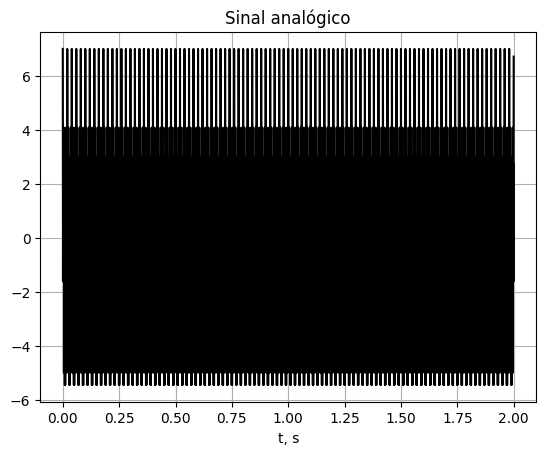

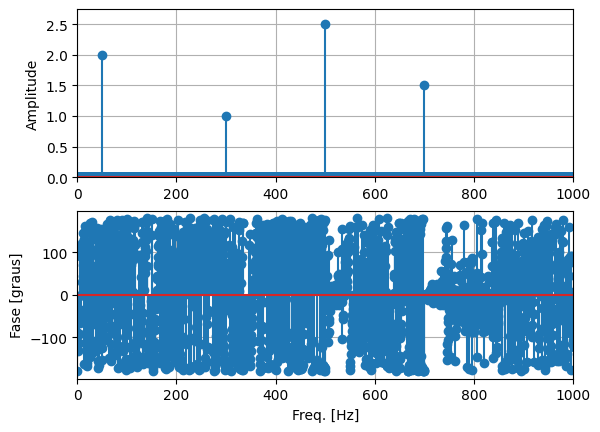

In [1]:
import control as ct
import numpy as np
import matplotlib.pyplot as plt
import espectro
import importlib
importlib.reload(espectro)

fs = 10000
T = 2
ta = np.arange(T*fs)/fs

sa = 2*np.cos(2*np.pi*50*ta) + np.cos(2*np.pi*300*ta) + 2.5*np.cos(2*np.pi*500*ta) + 1.5*np.cos(2*np.pi*700*ta)

plt.figure()
plt.plot(ta,sa,color='k'), plt.grid()
plt.title("Sinal analógico")
plt.xlabel("t, s")


espectro.espectro1D(sa, fs, 2)



### Exercício 2 ###
Projetar um filtro IIR Butterworth (manualmente, <u>usando as equações do filtro</u>) para eliminar a componente de 50Hz (reduzir para menos de 15% de sua amplitude original). É desejável que o filtro não afete (tolerância de ± 3%) as amplitudes das componentes que devem permanecer no sinal.

All poles:  [ 667.26313001+667.26313001j -667.26313001+667.26313001j
 -667.26313001-667.26313001j  667.26313001-667.26313001j]
Stable poles:  [np.complex128(-667.2631300082995+667.2631300082996j), np.complex128(-667.2631300082996-667.2631300082995j)]
H(s): <TransferFunction>: sys[0]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


          s^2
------------------------
s^2 + 1335 s + 8.905e+05

H(z): <TransferFunction>: sys[0]$sampled
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


0.9355 z^2 - 1.871 z + 0.9355
-----------------------------
   z^2 - 1.867 z + 0.8752

dt = 0.0001



c:\Users\mateu\AppData\Local\Programs\Python\Python312\Lib\site-packages\control\xferfcn.py:1087: ComplexWarning: Casting complex values to real discards the imaginary part
  den[j, :maxindex+1] = poly(poles[j])
c:\Users\mateu\AppData\Local\Programs\Python\Python312\Lib\site-packages\control\xferfcn.py:1117: ComplexWarning: Casting complex values to real discards the imaginary part
  num[i, j, maxindex+1-len(numpoly):maxindex+1] = numpoly
c:\Users\mateu\AppData\Local\Programs\Python\Python312\Lib\site-packages\control\xferfcn.py:1087: ComplexWarning: Casting complex values to real discards the imaginary part
  den[j, :maxindex+1] = poly(poles[j])
c:\Users\mateu\AppData\Local\Programs\Python\Python312\Lib\site-packages\control\xferfcn.py:1117: ComplexWarning: Casting complex values to real discards the imaginary part
  num[i, j, maxindex+1-len(numpoly):maxindex+1] = numpoly


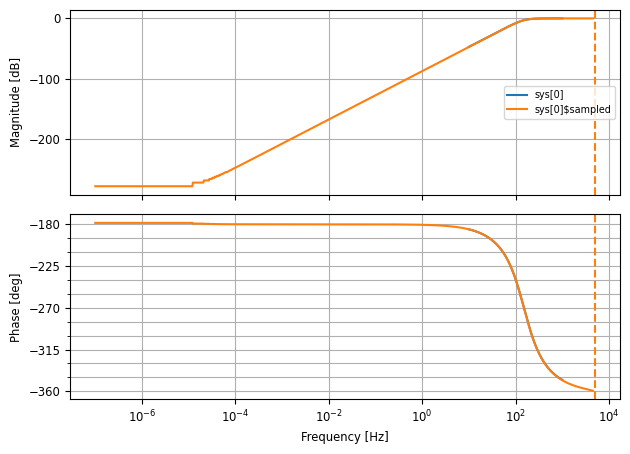

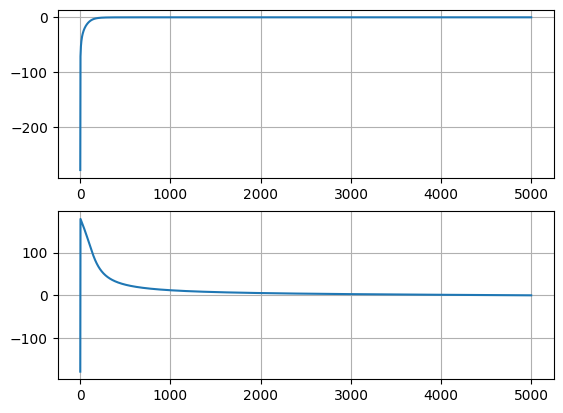

In [2]:
import math
from scipy.signal import freqz

Rs = 0.15
Rp = 0.97
Ws = 2*np.pi*50
Wp = 2*np.pi*300

N = math.log10((1/Rp**2 -1) / (1/Rs**2 -1)) / (2*math.log10(Wp/Ws))
N = int(np.sign(N)*np.ceil(abs(N)))

Wc = Wp * (1/(1/Rp**2 -1))**(1/(2*N))

N = abs(N)

k = np.arange(0,2*N)
poles = Wc*np.exp((1j*np.pi/(2*N))*(2*k+N-1))
print('All poles: ',poles)
stPoles = [p for p in poles if np.real(p)<0]
print('Stable poles: ',stPoles)

numS = np.append(1,np.zeros(N))
denS = np.poly(stPoles)
Hs = ct.tf(numS,denS)
print('H(s):',Hs)

Ts = 1/fs
Hz = ct.c2d(Hs, Ts, 'tustin')
print('H(z):',Hz)

ct.bode(Hs, dB=True, Hz=True)
ct.bode(Hz, dB=True, Hz=True)


numZ = Hz.num[0][0]
denZ = Hz.den[0][0]
w,h = freqz(numZ,denZ,worN=2000,fs=fs)
fig = plt.figure(3)
fig.clf()
ax0 = fig.add_subplot(211)
ax0.plot(w,20*np.log10(abs(h)))
ax0.grid(True)
ax1 = fig.add_subplot(212)
ax1.plot(w,np.angle(h)*180/np.pi)
ax1.grid(True)
plt.show()

# Exercício 3 #
Fazer uma função Python para implementar o filtro projetado. Esta função deve receber como argumento de entrada somente o sinal a ser filtrado e deve devolver somente o sinal filtrado e não deve conter comandos de construção do filtro. Aplicar esta função no sinal do exercício 1. Forneça o espectro do sinal filtrado que comprova o funcionamento da função de filtragem.

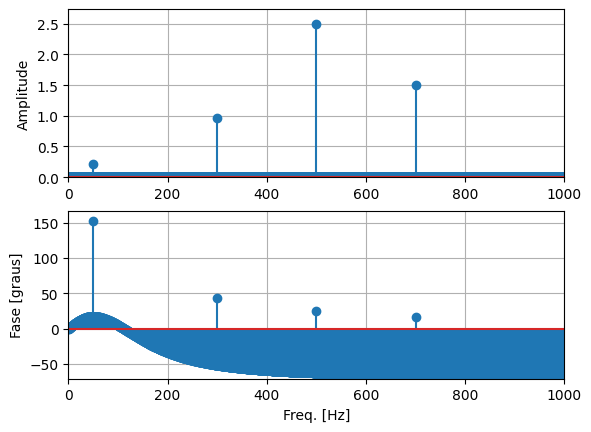

In [3]:
from scipy.signal import lfilter

filtered_signal = lfilter(numZ, denZ, sa)

espectro.espectro1D(filtered_signal, fs, 3)

# Exercício 4 #
Projetar um filtro IIR Butterworth (manualmente, <u>usando as equações do filtro</u>) para eliminar a componente de 700Hz (reduzir para menos de 15% de sua amplitude original). É desejável que o filtro não afete (tolerância de ± 3%) as amplitudes das componentes que devem permanecer no sinal.

All poles:  [  564.39104383+3563.42480784j  -564.39104383+3563.42480784j
 -1637.92660377+3214.61195981j -2551.13049563+2551.13049563j
 -3214.61195981+1637.92660377j -3563.42480784 +564.39104383j
 -3563.42480784 -564.39104383j -3214.61195981-1637.92660377j
 -2551.13049563-2551.13049563j -1637.92660377-3214.61195981j
  -564.39104383-3563.42480784j   564.39104383-3563.42480784j
  1637.92660377-3214.61195981j  2551.13049563-2551.13049563j
  3214.61195981-1637.92660377j  3563.42480784 -564.39104383j
  3563.42480784 +564.39104383j  3214.61195981+1637.92660377j
  2551.13049563+2551.13049563j  1637.92660377+3214.61195981j]
Stable poles:  [np.complex128(-564.391043829049+3563.4248078446876j), np.complex128(-1637.9266037735306+3214.6119598123037j), np.complex128(-2551.1304956349636+2551.130495634964j), np.complex128(-3214.611959812303+1637.9266037735308j), np.complex128(-3563.424807844687+564.3910438290495j), np.complex128(-3563.4248078446876-564.3910438290486j), np.complex128(-3214.611959812303

c:\Users\mateu\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\signal\_lti_conversion.py:461: LinAlgWarning: Ill-conditioned matrix (rcond=9.03737e-63): result may not be accurate.
  ad = linalg.solve(ima, np.eye(a.shape[0]) + (1.0-alpha)*dt*a)
c:\Users\mateu\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\signal\_lti_conversion.py:462: LinAlgWarning: Ill-conditioned matrix (rcond=9.03737e-63): result may not be accurate.
  bd = linalg.solve(ima, dt*b)
c:\Users\mateu\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\signal\_lti_conversion.py:465: LinAlgWarning: Ill-conditioned matrix (rcond=9.0054e-63): result may not be accurate.
  cd = linalg.solve(ima.transpose(), c.transpose())
c:\Users\mateu\AppData\Local\Programs\Python\Python312\Lib\site-packages\control\xferfcn.py:1087: ComplexWarning: Casting complex values to real discards the imaginary part
  den[j, :maxindex+1] = poly(poles[j])
c:\Users\mateu\AppData\Local\Programs\Python\Python

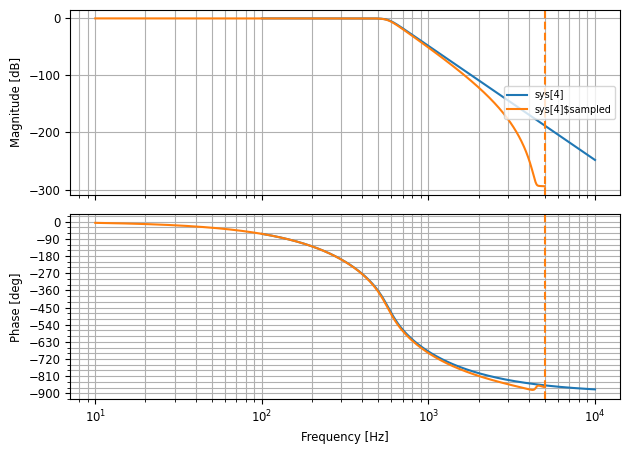

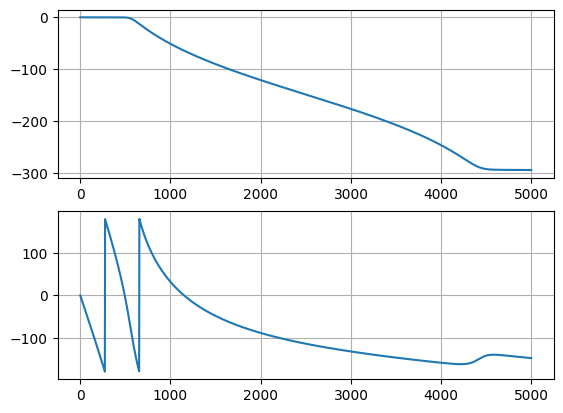

In [4]:
Rs = 0.15
Rp = 0.97
Ws = 2*np.pi*700
Wp = 2*np.pi*500

N = math.log10((1/Rp**2 -1) / (1/Rs**2 -1)) / (2*math.log10(Wp/Ws))
N = int(np.ceil(N))

Wc = Wp * (1/(1/Rp**2 -1))**(1/(2*N))

k = np.arange(0,2*N)
poles = Wc*np.exp((1j*np.pi/(2*N))*(2*k+N-1))
print('All poles: ',poles)
stPoles = [p for p in poles if np.real(p)<0]
print('Stable poles: ',stPoles)

numS = Wc**N
denS = np.poly(stPoles)
Hs = ct.tf(numS,denS)
print('H(s):',Hs)

Ts = 1/fs
Hz = ct.c2d(Hs, Ts, 'tustin')
print('H(z):',Hz)

ct.bode(Hs, dB=True, Hz=True)
ct.bode(Hz, dB=True, Hz=True)


numZ = Hz.num[0][0]
denZ = Hz.den[0][0]
w,h = freqz(numZ,denZ,worN=2000,fs=fs)
fig = plt.figure(3)
fig.clf()
ax0 = fig.add_subplot(211)
ax0.plot(w,20*np.log10(abs(h)))
ax0.grid(True)
ax1 = fig.add_subplot(212)
ax1.plot(w,np.angle(h)*180/np.pi)
ax1.grid(True)
plt.show()

# Exercício 5 #
Fazer uma função Python para implementar o filtro projetado. Esta função deve receber como argumento de entrada somente o sinal a ser filtrado e deve devolver somente o sinal filtrado e não deve conter comandos de construção do filtro. Aplicar esta função no sinal do exercício 1. Forneça o espectro do sinal filtrado que comprova o funcionamento da função de filtragem.

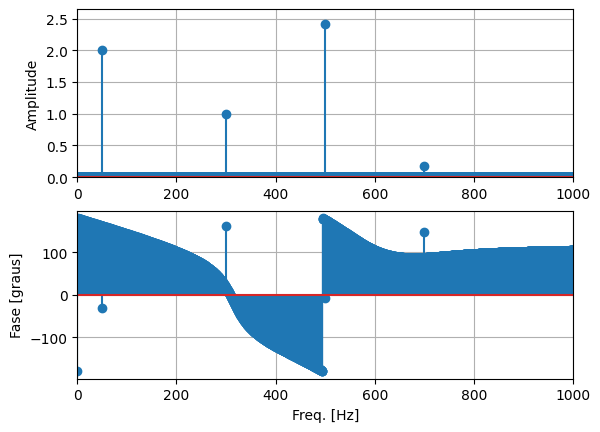

In [5]:
filtered_signal = lfilter(numZ, denZ, sa)

espectro.espectro1D(filtered_signal, fs, 3)